### Exercise 4.1: Load and prepare the data

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
inp0 = pd.read_csv("Social_Network_Ads.csv")
inp0.head()

,User ID,Gender,Age,EstimatedSalary,Clicked
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
inp0.shape

(400, 5)

Dropping user Id

In [4]:
inp0.drop("User ID", axis=1, inplace=True)
inp0.head()

,Gender,Age,EstimatedSalary,Clicked
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Encoding gender

In [5]:
inp0['Gender'] = inp0.Gender.map({'Female':1, 'Male':0})
inp0.Gender.value_counts()

1    204
0    196
Name: Gender, dtype: int64

In [6]:
inp0.head()

,Gender,Age,EstimatedSalary,Clicked
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


### Exercise 4.2: Building the competing models

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(inp0, train_size=0.7, random_state=42)
df_train.shape, df_test.shape

((280, 4), (120, 4))

In [8]:
X_train = df_train.drop("Clicked", axis=1)
y_train = df_train[['Clicked']]
X_test = df_test.drop("Clicked", axis=1)
y_test = df_test[['Clicked']]
X_train.head(5)

,Gender,Age,EstimatedSalary
157,0,29,75000
109,1,38,80000
17,0,45,26000
347,1,54,108000
24,0,46,23000


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=7, \
                            random_state=42, \
                            n_estimators=50)
rf.fit(X_train, y_train)

C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(max_depth=7, n_estimators=50, random_state=42)

In [11]:
from sklearn.svm import SVC
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)

C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(probability=True, random_state=42)

### Exercise 4.3: Confusion matrix for click prediction models:

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix as CM

In [13]:
confusion_matrix(y_train, dt.predict(X_train))

array([[180,   4],
       [  5,  91]], dtype=int64)

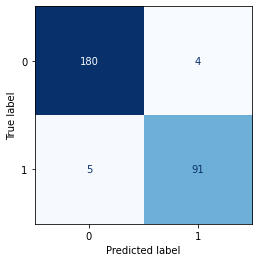

In [15]:
CM(dt, X_train, y_train, cmap="Blues", colorbar=None)
plt.show()

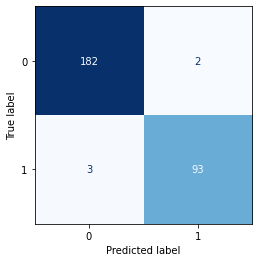

In [16]:
CM(rf, X_train,\
   y_train, cmap="Blues", colorbar=None)
plt.show()

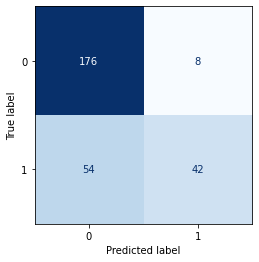

In [17]:
CM(svc, X_train,\
   y_train, cmap="Blues", colorbar=None)
plt.show()

### Precision, Recall, and F1 Score

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_train, svc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       184
           1       0.84      0.44      0.58        96

    accuracy                           0.78       280
   macro avg       0.80      0.70      0.71       280
weighted avg       0.79      0.78      0.76       280



In [20]:
from sklearn.metrics import accuracy_score, recall_score

In [21]:
y_train_pred = dt.predict(X_train)
print("DT Accuracy:", accuracy_score(y_train, y_train_pred))
print("DT Recall:", recall_score(y_train, y_train_pred))

DT Accuracy: 0.9678571428571429
DT Recall: 0.9479166666666666


In [22]:
y_train_pred = rf.predict(X_train)
print("RF Accuracy:", accuracy_score(y_train, y_train_pred))
print("RF Recall:", recall_score(y_train, y_train_pred))

RF Accuracy: 0.9821428571428571
RF Recall: 0.96875


In [23]:
y_train_pred = svc.predict(X_train)
print("SVC Accuracy:", accuracy_score(y_train, y_train_pred))
print("SVC Recall:", recall_score(y_train, y_train_pred))

SVC Accuracy: 0.7785714285714286
SVC Recall: 0.4375


### Area Under ROC curve (AUC)

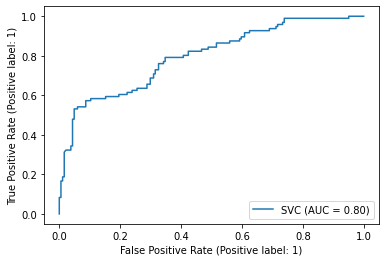

In [24]:
from sklearn.metrics import plot_roc_curve as roc
roc(svc, X_train, y_train)
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
y_pred_train_probs = svc.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train_probs)

0.7967334692028986

### Area under PR curve 

In [26]:
from sklearn.metrics import plot_precision_recall_curve as prc

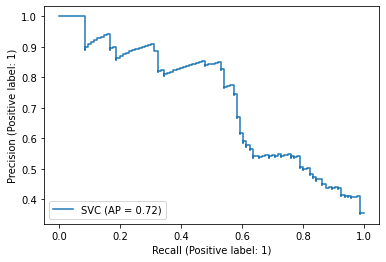

In [27]:
prc(svc, X_train, y_train)
plt.show()

In [ ]:
fig, ax =plt.subplots(1,1, figsize=[8,7.5])
prc(svc, X_train, y_train, ax=ax)
# plt.show()
plt.savefig("02_prc_svm.jpg",dpi=200)

### Exercise 4.4: Model evaluation using cross-validation

In [28]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy','precision','recall']

In [29]:
cv_scores = cross_validate(estimator=dt,\
                X = X_train,\
                y = y_train,\
                cv = 3,\
                scoring = scoring)
pd.DataFrame(cv_scores)

,fit_time,score_time,test_accuracy,test_precision,test_recall
0,0.000000,0.013905,0.882979,0.862069,0.78125
1,0.018696,0.004001,0.849462,0.821429,0.71875
2,0.002990,0.002992,0.860215,0.756757,0.87500


In [30]:
pd.DataFrame(cv_scores).mean()

fit_time          0.007229
score_time        0.006966
test_accuracy     0.864219
test_precision    0.813418
test_recall       0.791667
dtype: float64

In [31]:
cv_scores = cross_validate(estimator=rf,
                X = X_train,
                y = y_train,
                cv = 3,
                scoring = scoring)
pd.DataFrame(cv_scores).mean()

C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


fit_time          0.051481
score_time        0.007189
test_accuracy     0.885648
test_precision    0.816784
test_recall       0.864583
dtype: float64

In [32]:
cv_scores = cross_validate(estimator=svc,
                X = X_train,
                y = y_train,
                cv = 3,
                scoring = scoring)
pd.DataFrame(cv_scores).mean()

C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


fit_time          0.005639
score_time        0.010189
test_accuracy     0.771334
test_precision    0.833007
test_recall       0.416667
dtype: float64

### Exercise 4.5: Validation curves for Ad click prediction

In [33]:
from sklearn.model_selection import validation_curve

In [34]:
param_values = np.arange(1,10,1)
res = validation_curve(dt, X_train, y_train, \
                     param_name='max_depth',
                     param_range=param_values,
                     scoring="accuracy",
                     n_jobs=-1,
                     cv=3)

In [35]:
train_scores, test_scores = res[0], res[1]
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

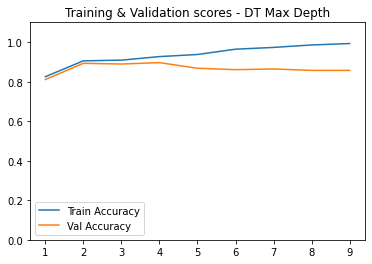

In [36]:
plt.plot(param_values, train_scores_mean,label="Train Accuracy")
plt.plot(param_values, test_scores_mean,label="Val Accuracy")
plt.ylim(0,1.1)
plt.legend()
plt.title("Training & Validation scores - DT Max Depth")
plt.show()

### Hyper-parameter control

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_4 = DecisionTreeClassifier(max_depth=4, random_state=42)

In [39]:
cv_scores = cross_validate(estimator=dt_4,
                X = X_train, y = y_train,
                cv = 3, scoring = "accuracy")
pd.DataFrame(cv_scores).mean()

fit_time      0.001990
score_time    0.004270
test_score    0.896324
dtype: float64

In [40]:
dt_10 = DecisionTreeClassifier(max_depth=10, random_state=42)
cv_scores = cross_validate(estimator=dt_10,
                X = X_train, y = y_train,
                cv = 3, scoring = "accuracy")
pd.DataFrame(cv_scores).mean()

fit_time      0.004852
score_time    0.001327
test_score    0.860673
dtype: float64

### Bonus: Validation curves for Ad click prediction

In [41]:
from sklearn.model_selection import learning_curve

In [42]:
res = learning_curve(svc, X_train, y_train, \
                     train_sizes=np.arange(0.2,1.2,0.2),
                     scoring="recall",
                     n_jobs=-1,random_state=42)

In [43]:
train_sizes, train_scores, test_scores = res[0], res[1], res[2]
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

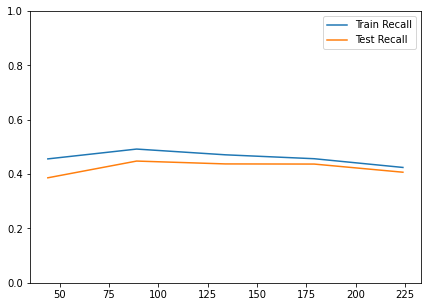

In [44]:
plt.figure(figsize=[7,5])
plt.plot(train_sizes, train_scores_mean,label="Train Recall")
plt.plot(train_sizes, test_scores_mean,label="Test Recall")
plt.ylim(0,1)
plt.legend()
plt.title("")
plt.show()